<a href="https://colab.research.google.com/github/LucasGomes9/pytorchExercise-/blob/main/Aula04_Processamento_de_imagens_com_OpenCV_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lucas Gomes Tavares - 201910460



##Carregando Dependências

Bibliotecas necessárias usadas neste exemplo: numpy, pandas, cv2, skimage, PIL, matplotlib

Numpy é uma biblioteca de manipulação de array, usada para álgebra linear, transformação de Fourier e capacidades de números aleatórios.

Pandas é uma biblioteca para manipulação e análise de dados.

CV2 é uma biblioteca para tarefas de visão computacional.

Skimage é uma biblioteca que oferece suporte a aplicativos de processamento de imagem em python.

Matplotlib é uma biblioteca que gera figuras e fornece um kit de ferramentas de interface gráfica com o usuário.



In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import scipy

# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
#     -O common.py

##Passo 2: Ler a imagem de alguma url:

> Nesta etapa, vamos ler imagens de urls e exibi-las usando openCV.

Conforme vimos na nossa primeira aula prática,  observe a diferença ao ler imagens em formato RGB e BGR. Os canais de cores de entrada padrão estão no formato BGR ou RGB para openCV.

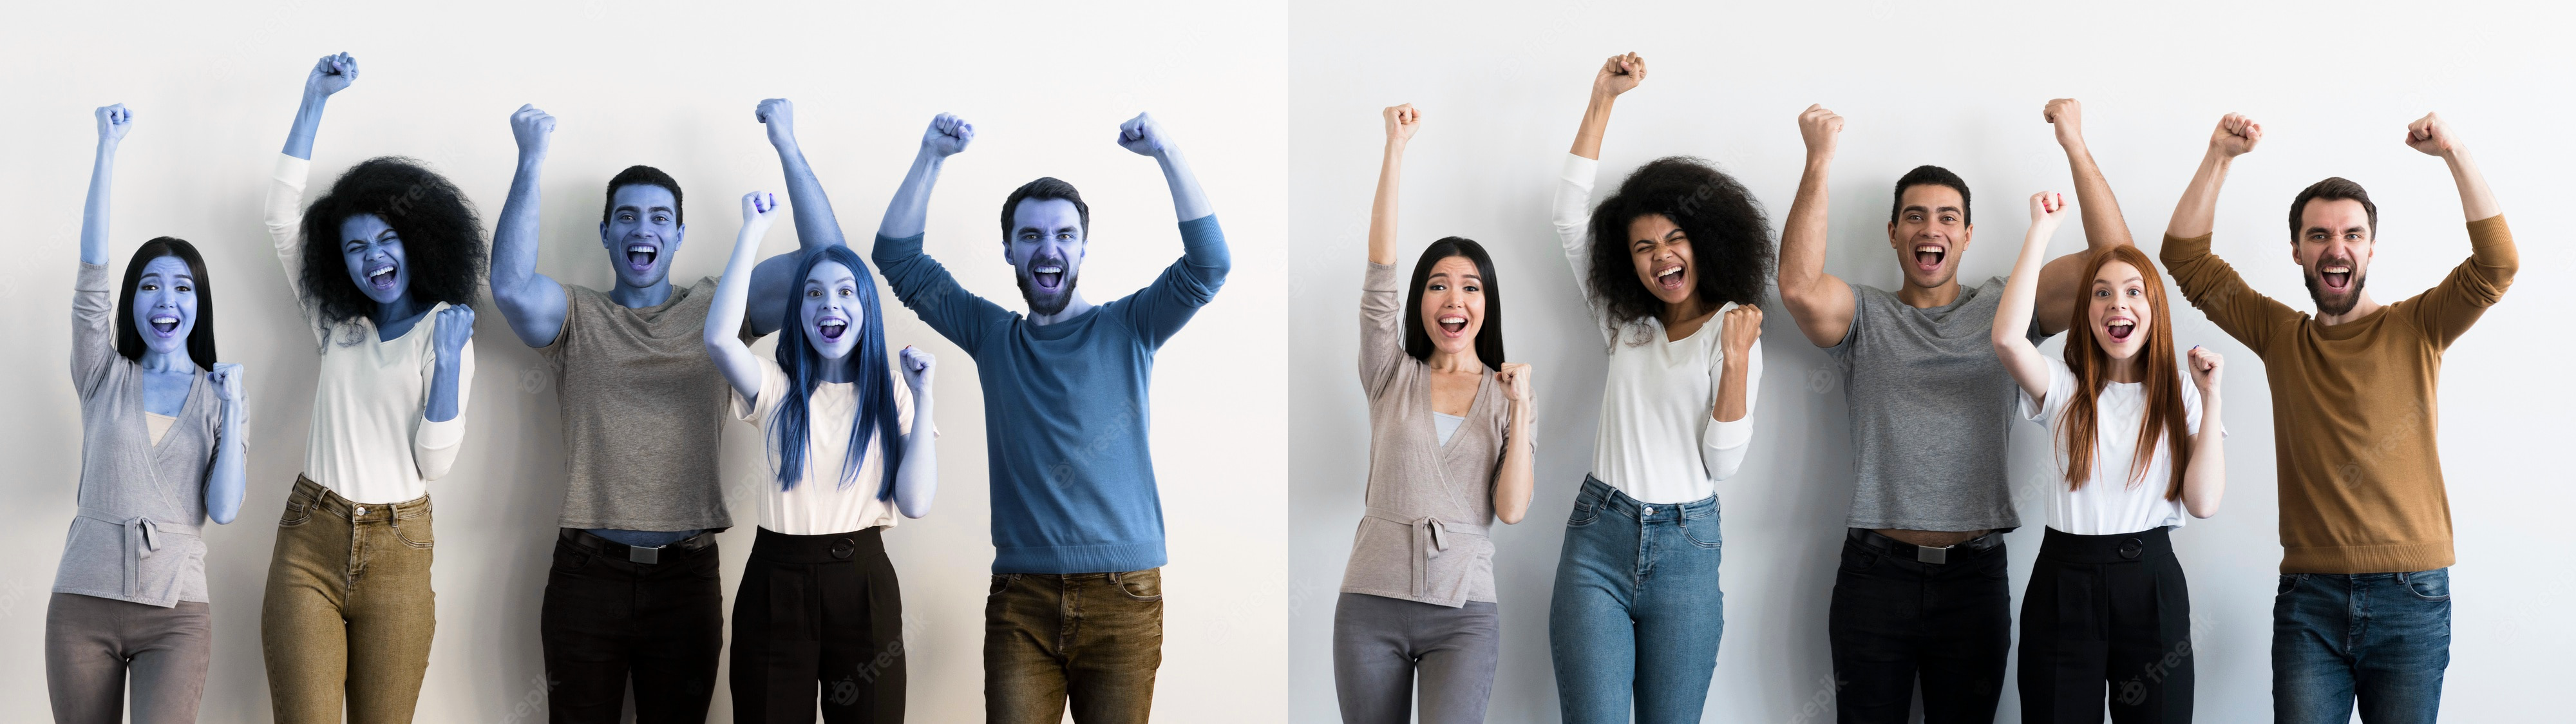

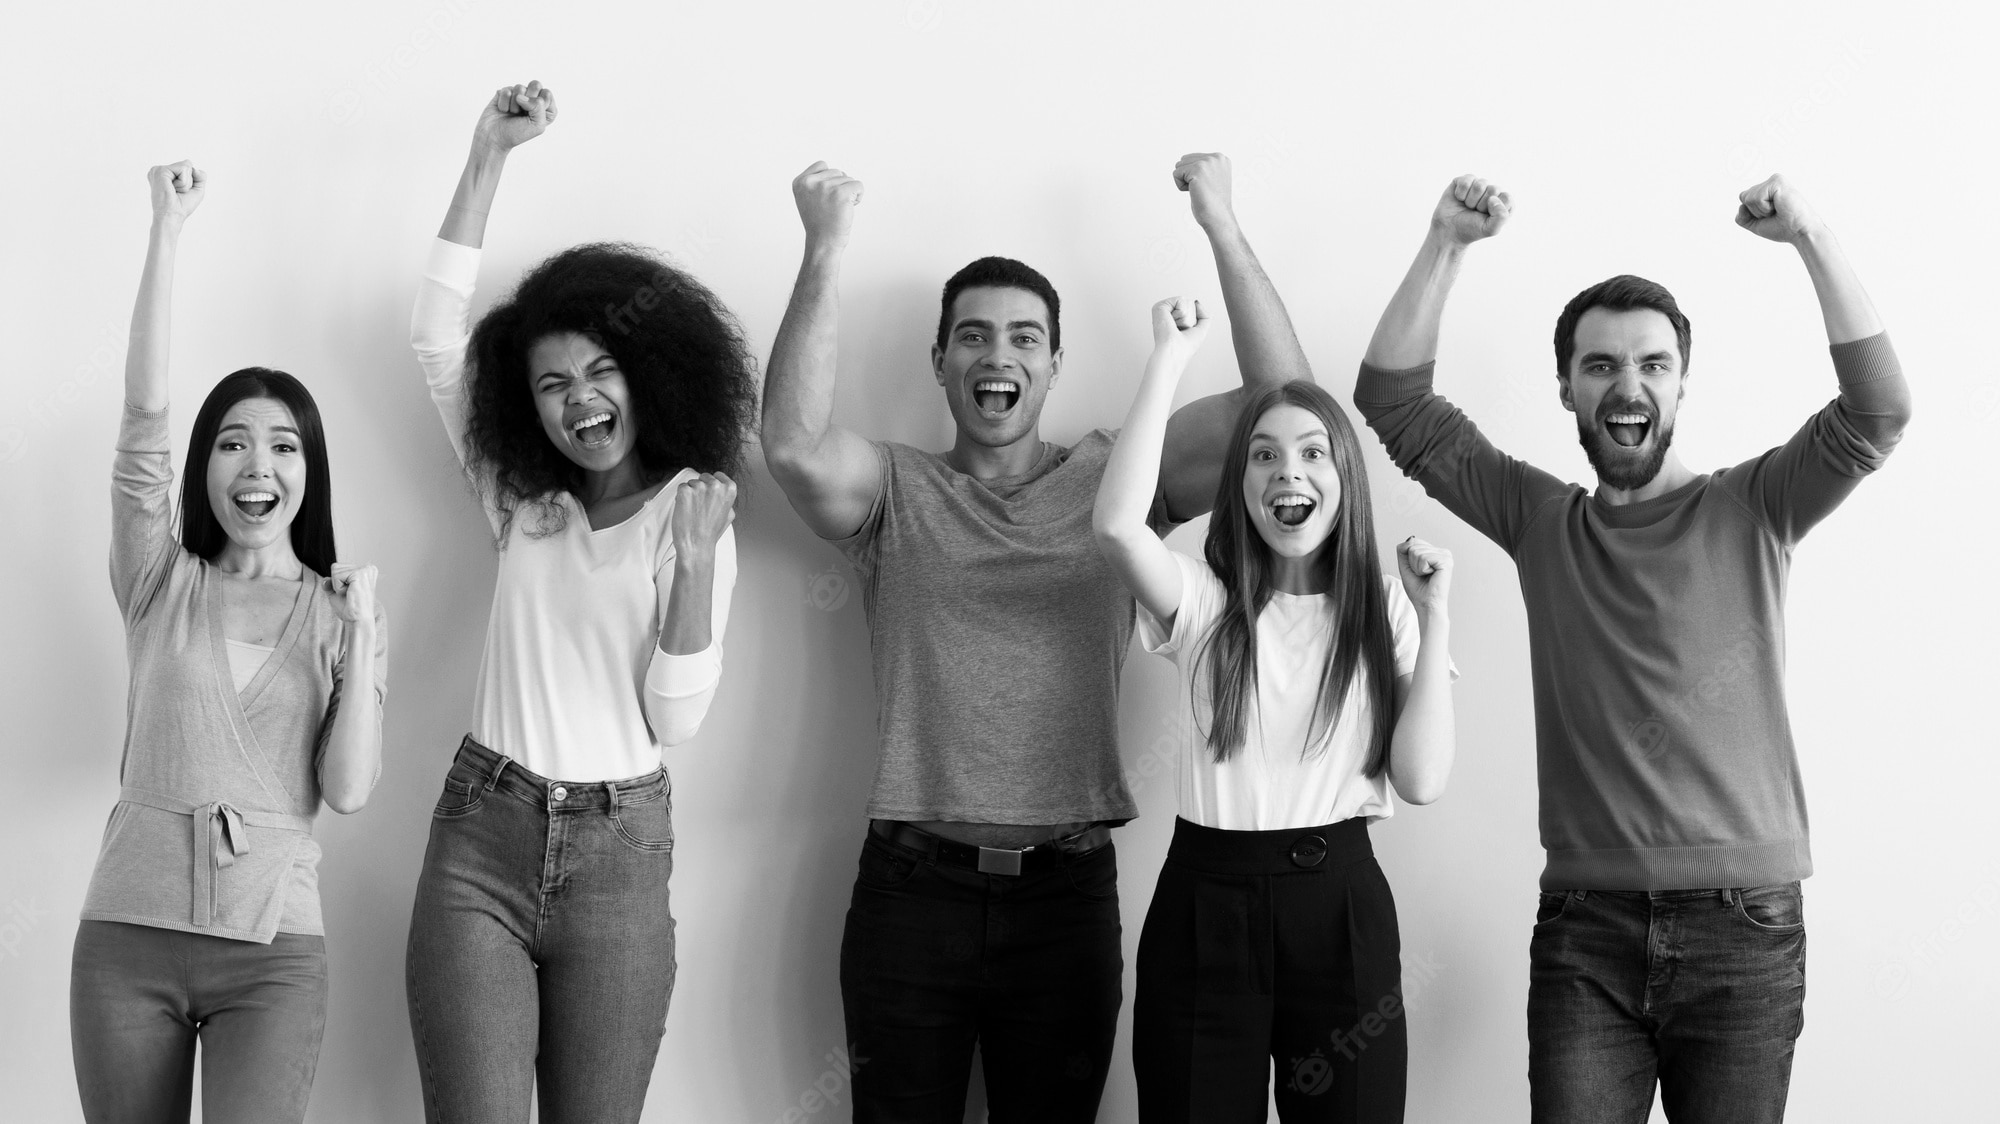

In [ ]:
# Pegando uma URL com a face das pessoas para uso do openCV:
urls = ["https://img.freepik.com/fotos-gratis/comunidade-de-pessoas-adultas-torcendo-juntas_23-2148431414.jpg?w=2000"]

# Lendo e mostrando cada imagem da lista em BGR e RGB:
for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  
  final_frame = cv.hconcat((image, image_2)) 
  cv2_imshow(final_frame)

  print('\n')

  image_2_PB = cv.cvtColor( image_2, cv.COLOR_BGR2GRAY)
  cv2_imshow(image_2_PB)




 A principal vantagem dessa técnica é a baixa necessidade de processamento para realizar a identificação dos objetos, o que se traduz em alta velocidade de detecção.

Hoje vamos usar alguns detectores de objetos que já foram treinados, são de domínio público, e podem ser utilizados para detecção de vários tipos de objetos no OpenCV. Uma lista de detectores para vários tipos de objetos está disponível no github do openCV em:

github.com/opencv/opencv/tree/master/data/haarcascades 

Detectores Haar, assim como outras técnicas de visão computacional, são algoritmos que pode ser treinados para detectar tipos de objetos que possuem características em comum. Por exemplo, digamos queremos detectar faces humanas. 

É uma característica comum que entre todas as faces a região dos olhos é mais escura do que a região das bochechas. Portanto, uma característica Haar comum para a detecção de face é um conjunto de dois retângulos adjacentes que ficam na região dos olhos e acima da região das bochechas. A posição desses retângulos é definida em relação a uma janela de detecção que age como uma caixa delimitadora para o objeto alvo (a face, neste caso).



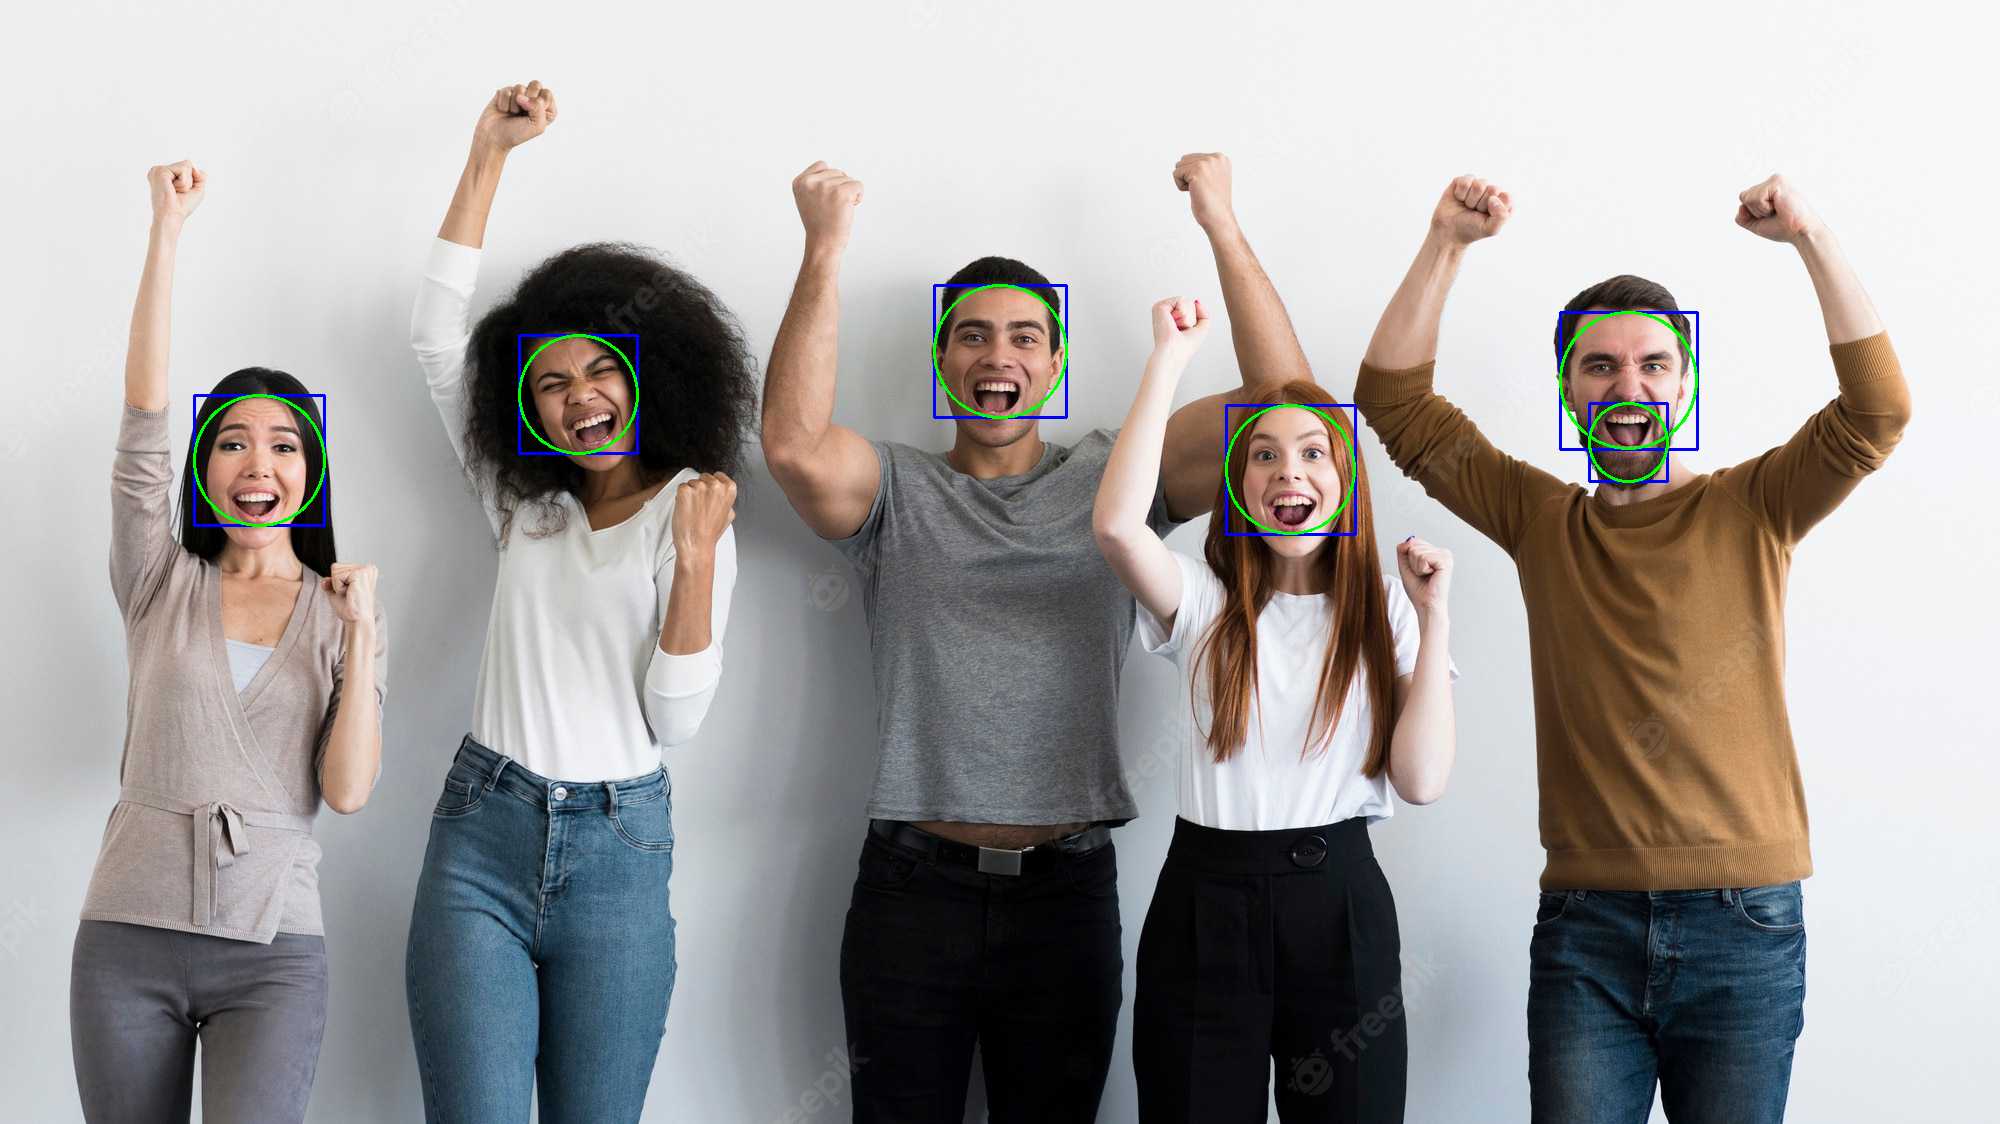

In [ ]:

# Pegando o modelo já treinado para executarmos nossa tarefa e estamos usando o cv.data.haarcascades para que não precisamos incluir no projeto o modelo treinado, pegamos direto da lib
face_cascade = cv.CascadeClassifier(cv.data.haarcascades +'haarcascade_frontalface_alt2.xml')


#Executa a detecção das faces utilizanod o detectmultiscale, mudamos alguns parametros pois foi o que tivemos melhor resultado levando em consideração a foto em questão, ainda tivemos
# um certo problema com uma das bocas, mas no geral está bom:
faces = face_cascade.detectMultiScale(image_2_PB, scaleFactor = 1.05, minNeighbors = 6, minSize = (30,30), flags = cv.CASCADE_SCALE_IMAGE)

# Desenha retangulos na iamgem original (colorida) para cada face encontrada:
for (x,y,w,h) in faces:  
     cv.rectangle(image_2,(x,y),(x+w,y+h),(255,0,0),2)
      #estamos desenhando o círculo para todos os rostos, fizemos um pequeno cálculo para saber o radius e onde encaixar o círculo, convertemos para int, para não ter problema com número muito
      #quebrados e pq estava gerando alguns bugs 
     cv.circle(image_2,(int(x+w/2), int(y+h/2)),int(w/2),(0,255,0),2 )

#mostra a imagem
cv2_imshow(image_2)
